# Dollar price prediction #

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from pyGRNN import GRNN
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets
data = pd.read_csv("BDG.csv",header=None)

# Loading training datasets
## 2023 subsets 120, 90 and 60 values ##
subset_2023_120 = pd.read_csv("120_2023.csv",header=None)
subset_2023_90 = pd.read_csv("90_2023.csv",header=None)
subset_2023_60 = pd.read_csv("60_2023.csv",header=None)

## 2019 subsets 120, 90 and 60 values ##
subset_2019_120 = pd.read_csv("120_2019.csv",header=None)
subset_2019_90 = pd.read_csv("90_2019.csv",header=None)
subset_2019_60 = pd.read_csv("60_2019.csv",header=None)

## 2015 subsets 120, 90 and 60 values ##
subset_2015_120 = pd.read_csv("120_2015.csv",header=None)
subset_2015_90 = pd.read_csv("90_2015.csv",header=None)
subset_2015_60 = pd.read_csv("60_2015.csv",header=None)
 
# Loading 'x' predict and test datasets 2023
test_120_2023 = pd.read_csv("120_2023_test.csv", header = None)
test_90_2023 = pd.read_csv("90_2023_test.csv", header = None)
test_60_2023 = pd.read_csv("60_2023_test.csv", header = None)

# Loading 'x' predict and test datasets 2019
test_120_2019 = pd.read_csv("120_2019_test.csv", header = None)
test_90_2019 = pd.read_csv("90_2019_test.csv", header = None)
test_60_2019 = pd.read_csv("60_2019_test.csv", header = None)

# Loading 'x' predict and test datasets 2019
test_120_2015 = pd.read_csv("120_2015_test.csv", header = None)
test_90_2015 = pd.read_csv("90_2015_test.csv", header = None)
test_60_2015 = pd.read_csv("60_2015_test.csv", header = None)


In [3]:
# Assignament of global variables
###2023###
X_120_2023 = test_120_2023[[0]].to_numpy()
Y_120_2023 = test_120_2023[[1]].to_numpy()
X_90_2023 = test_90_2023[[0]].to_numpy()
Y_90_2023 = test_90_2023[[1]].to_numpy()
X_60_2023 = test_60_2023[[0]].to_numpy()
Y_60_2023 = test_60_2023[[1]].to_numpy()
###2019###
X_120_2019 = test_120_2019[[0]].to_numpy()
Y_120_2019 = test_120_2019[[1]].to_numpy()
X_90_2019 = test_90_2019[[0]].to_numpy()
Y_90_2019 = test_90_2019[[1]].to_numpy()
X_60_2019 = test_60_2019[[0]].to_numpy()
Y_60_2019 = test_60_2019[[1]].to_numpy()
###2015###
X_120_2015 = test_120_2015[[0]].to_numpy()
Y_120_2015 = test_120_2015[[1]].to_numpy()
X_90_2015 = test_90_2015[[0]].to_numpy()
Y_90_2015 = test_90_2015[[1]].to_numpy()
X_60_2015 = test_60_2015[[0]].to_numpy()
Y_60_2015 = test_60_2015[[1]].to_numpy()

## Plot of general data of our investigation ##

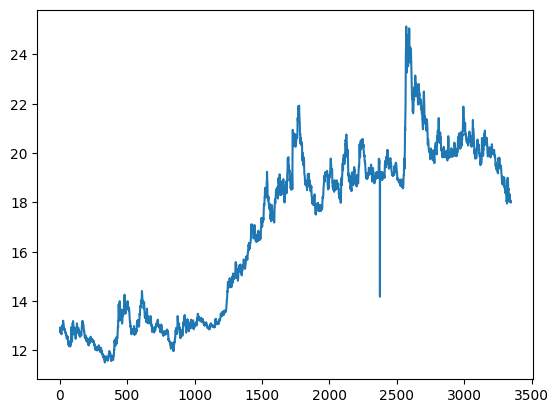

In [4]:
x = data[[0]].to_numpy()
y = data[[3]].to_numpy()
plt.plot(x, y)

## Creating GRNN model ##

In [5]:
# Example 1: use Isotropic GRNN with a Grid Search Cross validation to select the optimal bandwidth
IGRNN = GRNN()
IGRNN.sigma = 1.173
IGRNN.regularization_type = "l2"
params_IGRNN = {'kernel': ["RBF"],
                'sigma': list(np.arange(0.1, 4, 0.1)),
                'calibration': ['isotonic'],
                }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=3,
                          verbose=1
                          )

## 2023 train-test ##

### 120 data training ##

In [6]:
X_train = subset_2023_120[[0]].to_numpy()
y_train = subset_2023_120[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_120_2023)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_120_2023, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


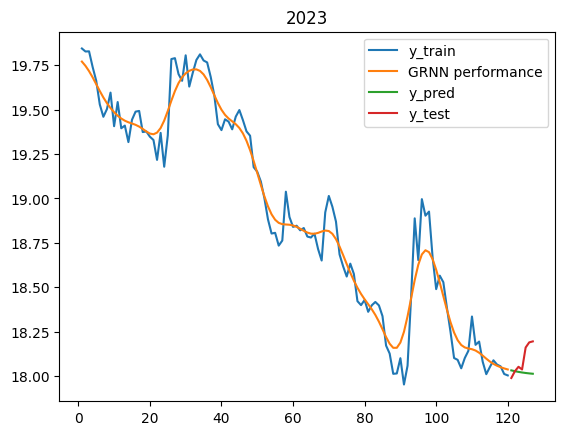

In [7]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_120_2023, y_pred, label='y_pred')
plt.plot(X_120_2023, Y_120_2023, label='y_test')
plt.title("2023")
plt.legend()
plt.show()

In [8]:
error = []
for i in range (0, 7):
    print(Y_120_2023[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_120_2023[i]) / Y_120_2023[i] * 100
    error.append(res)
print(error)

[17.989]
18.031847600336928
[18.0271]
18.02731494169892
[18.0521]
18.023381329949743
[18.0369]
18.020016743879488
[18.1605]
18.01717775990022
[18.1895]
18.014808472718713
[18.195]
18.012847040761542
[array([0.23818778]), array([0.00119233]), array([-0.1590877]), array([-0.09360398]), array([-0.78919765]), array([-0.96039763]), array([-1.00111547])]


### 90 data training

In [9]:
X_train = subset_2023_90[[0]].to_numpy()
y_train = subset_2023_90[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_90_2023)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_90_2023, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


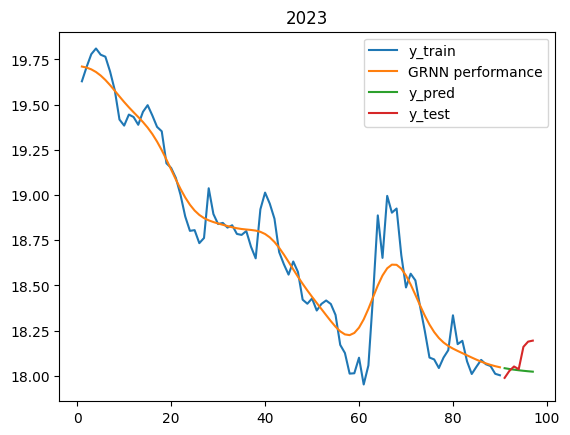

In [10]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_90_2023, y_pred, label='y_pred')
plt.plot(X_90_2023, Y_90_2023, label='y_test')
plt.title("2023")
plt.legend()
plt.show()

In [11]:
error = []
for i in range (0, 7):
    print(Y_90_2023[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_90_2023[i]) / Y_90_2023[i] * 100
    error.append(res)
print(error)

[17.989]
18.042526536042985
[18.0271]
18.038162648296144
[18.0521]
18.034389466374435
[18.0369]
18.031089580630027
[18.1605]
18.028176260420242
[18.1895]
18.025586689869375
[18.195]
18.023275072518274
[array([0.29755148]), array([0.06136677]), array([-0.09810789]), array([-0.03221407]), array([-0.72863489]), array([-0.90114247]), array([-0.94380284])]


###  60 data training ###

In [12]:
X_train = subset_2023_60[[0]].to_numpy()
y_train = subset_2023_60[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_60_2023)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_60_2023, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


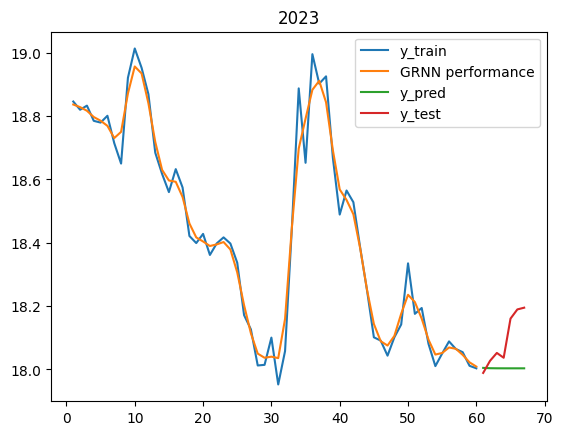

In [13]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_60_2023, y_pred, label='y_pred')
plt.plot(X_60_2023, Y_60_2023, label='y_test')
plt.title("2023")
plt.legend()
plt.show()

In [14]:
error = []
for i in range (0, 7):
    print(Y_120_2023[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_60_2023[i]) / Y_60_2023[i] * 100
    error.append(res)
print(error)

[17.989]
18.004897451922044
[18.0271]
18.00387887616179
[18.0521]
18.00360748356792
[18.0369]
18.003531029130457
[18.1605]
18.003509007281252
[18.1895]
18.00350261898046
[18.195]
18.0035007618687
[array([0.08837318]), array([-0.12881231]), array([-0.26862535]), array([-0.18500391]), array([-0.86446404]), array([-1.02255357]), array([-1.05248276])]


## 2019 train-test ##

### 120 data training ###

In [15]:
X_train = subset_2019_120[[0]].to_numpy()
y_train = subset_2019_120[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_120_2019)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_120_2019, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


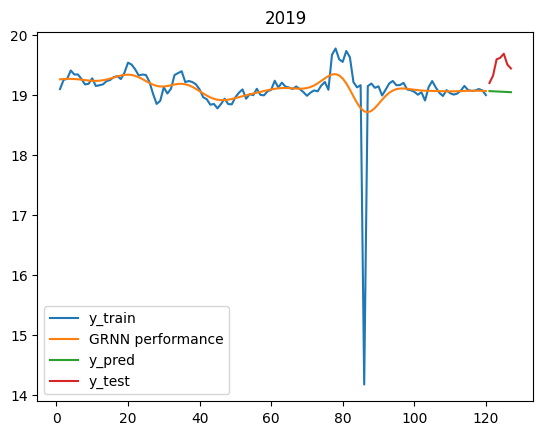

In [16]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_120_2019, y_pred, label='y_pred')
plt.plot(X_120_2019, Y_120_2019, label='y_test')
plt.title("2019")
plt.legend()
plt.show()

In [17]:
error = []
for i in range (0, 7):
    print(Y_120_2019[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_120_2019[i]) / Y_120_2019[i] * 100
    error.append(res)
print(error)

[19.19525]
19.059515638843923
[19.3165]
19.0567446742012
[19.5895]
19.053812746334827
[19.61375]
19.050817051841115
[19.6825]
19.04782619485957
[19.5015]
19.044886546865893
[19.43725]
19.042028280367948
[array([-0.70712474]), array([-1.34473287]), array([-2.73456318]), array([-2.87009342]), array([-3.2245589]), array([-2.34142734]), array([-2.03332117])]


### 90 data training

In [18]:
X_train = subset_2019_90[[0]].to_numpy()
y_train = subset_2019_90[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_90_2019)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_90_2019, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


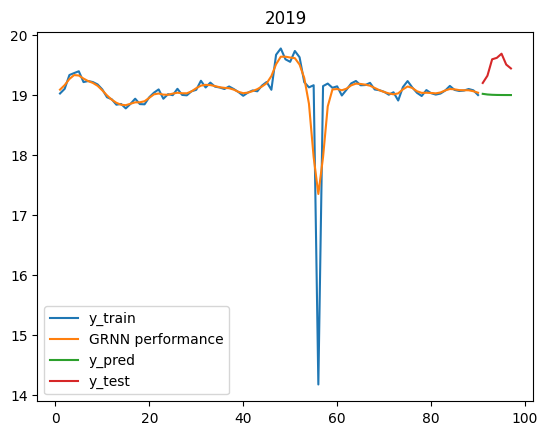

In [19]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_90_2019, y_pred, label='y_pred')
plt.plot(X_90_2019, Y_90_2019, label='y_test')
plt.title("2019")
plt.legend()
plt.show()

In [20]:
error = []
for i in range (0, 7):
    print(Y_90_2019[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_90_2019[i]) / Y_90_2019[i] * 100
    error.append(res)
print(error)

[19.19525]
19.01416363752951
[19.3165]
19.0034876128132
[19.5895]
18.99828594886731
[19.61375]
18.995901790947972
[19.6825]
18.9948372999003
[19.5015]
18.99436737905512
[19.43725]
18.99416095274611
[array([-0.94339153]), array([-1.62044049]), array([-3.01801501]), array([-3.15007691]), array([-3.49377721]), array([-2.60048007]), array([-2.27958712])]


### 60 data training

In [21]:
X_train = subset_2019_60[[0]].to_numpy()
y_train = subset_2019_60[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_60_2019)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_60_2019, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


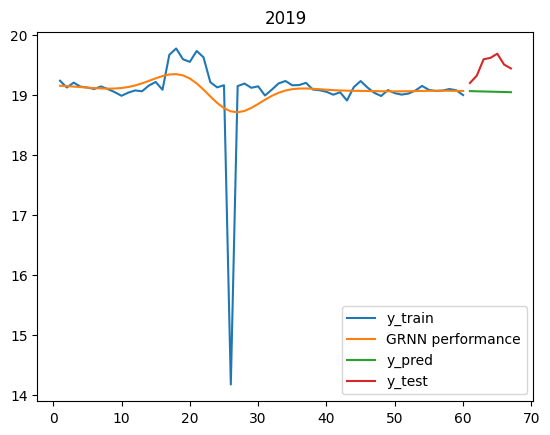

In [22]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_60_2019, y_pred, label='y_pred')
plt.plot(X_60_2019, Y_60_2019, label='y_test')
plt.title("2019")
plt.legend()
plt.show()

In [23]:
error = []
for i in range (0, 7):
    print(Y_60_2019[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_60_2019[i]) / Y_60_2019[i] * 100
    error.append(res)
print(error)

[19.19525]
19.05951563884392
[19.3165]
19.0567446742012
[19.5895]
19.053812746334827
[19.61375]
19.050817051841115
[19.6825]
19.04782619485957
[19.5015]
19.044886546865893
[19.43725]
19.042028280367948
[array([-0.70712474]), array([-1.34473287]), array([-2.73456318]), array([-2.87009342]), array([-3.2245589]), array([-2.34142734]), array([-2.03332117])]


## 2015 train-test

### 120 data training

In [24]:
X_train = subset_2015_120[[0]].to_numpy()
y_train = subset_2015_120[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_120_2015)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_120_2015, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


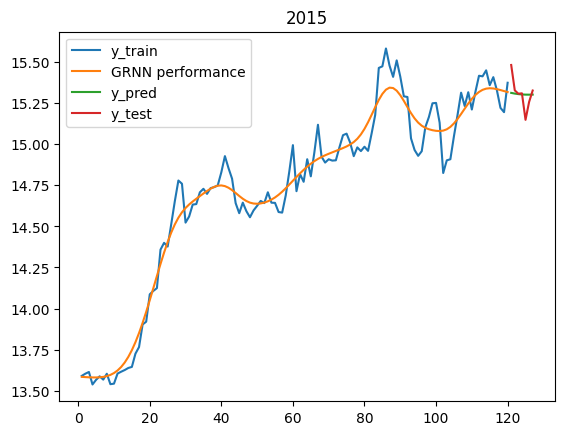

In [25]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_120_2015, y_pred, label='y_pred')
plt.plot(X_120_2015, Y_120_2015, label='y_test')
plt.title("2015")
plt.legend()
plt.show()

In [26]:
error = []
for i in range (0, 7):
    print(Y_120_2015[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_120_2015[i]) / Y_120_2015[i] * 100
    error.append(res)
print(error)

[15.4805]
15.310892511151373
[15.32625]
15.306672154192468
[15.306]
15.303524873877377
[15.30825]
15.301439421805878
[15.14725]
15.300334212896805
[15.25575]
15.300090953936916
[15.32525]
15.30057774407297
[array([-1.09562022]), array([-0.12774061]), array([-0.01617095]), array([-0.04448959]), array([1.0106403]), array([0.29065076]), array([-0.16099089])]


### 90 data training 

In [27]:
X_train = subset_2015_90[[0]].to_numpy()
y_train = subset_2015_90[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_90_2015)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_90_2015, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


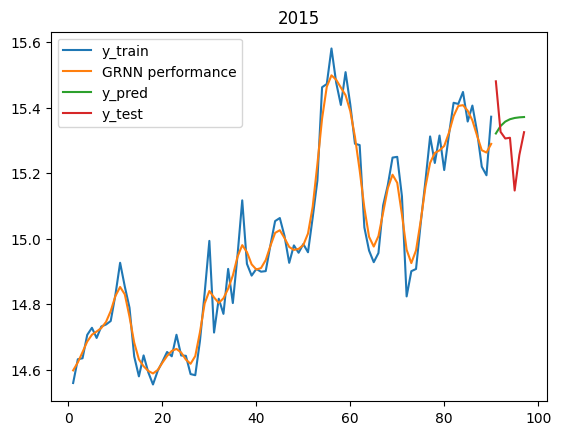

In [28]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_90_2015, y_pred, label='y_pred')
plt.plot(X_90_2015, Y_90_2015, label='y_test')
plt.title("2015")
plt.legend()
plt.show()

In [29]:
error = []
for i in range (0, 7):
    print(Y_90_2015[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_90_2015[i]) / Y_90_2015[i] * 100
    error.append(res)
print(error)

[15.4805]
15.321261507865886
[15.32625]
15.344077306744808
[15.306]
15.357552997351254
[15.30825]
15.364842689755209
[15.14725]
15.368627411866056
[15.25575]
15.370553945557715
[15.32525]
15.371525164957875
[array([-1.02863921]), array([0.11631878]), array([0.33681561]), array([0.36968752]), array([1.46150233]), array([0.75252902]), array([0.30195374])]


### 60 data training

In [30]:
X_train = subset_2015_60[[0]].to_numpy()
y_train = subset_2015_60[[3]].to_numpy()
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_60_2015)
y_pred_2 = best_model.predict(X_train)
mse_IGRNN = MSE(Y_60_2015, y_pred)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


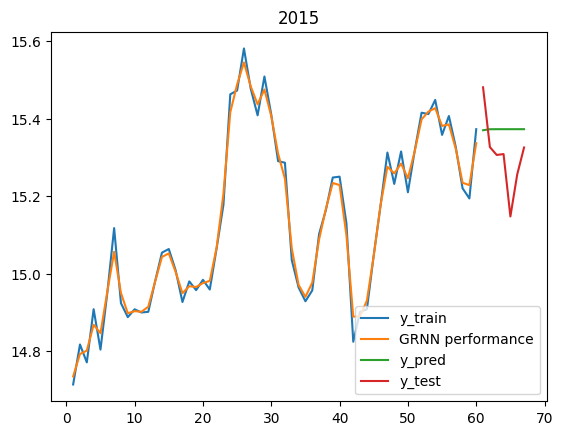

In [31]:
plt.plot(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred_2, label='GRNN performance')
plt.plot(X_60_2015, y_pred, label='y_pred')
plt.plot(X_60_2015, Y_60_2015, label='y_test')
plt.title("2015")
plt.legend()
plt.show()

In [32]:
error = []
for i in range (0, 7):
    print(Y_60_2015[i])
    print(y_pred[i])
    res = (y_pred[i] - Y_60_2015[i]) / Y_60_2015[i] * 100
    error.append(res)
print(error)

[15.4805]
15.369768792034021
[15.32625]
15.372327846489702
[15.306]
15.372489286930094
[15.30825]
15.372499333863097
[15.14725]
15.372499958581788
[15.25575]
15.37249999742476
[15.32525]
15.37249999983988
[array([-0.71529478]), array([0.30064658]), array([0.43440015]), array([0.41970398]), array([1.48706834]), array([0.7652852]), array([0.30831471])]
